In [10]:
suppressPackageStartupMessages(library(ggplot2))
suppressPackageStartupMessages(library(patchwork))
suppressPackageStartupMessages(library(dplyr))
suppressPackageStartupMessages(library(tidyverse))
suppressPackageStartupMessages(library(msigdbr))
suppressPackageStartupMessages(library(org.Hs.eg.db))
suppressPackageStartupMessages(library(fgsea))

## 查看R包msigdbr中包括的物种信息


In [5]:
msigdbr_species()
m_df = msigdbr(species = 'Homo sapiens')

species_name,species_common_name
<chr>,<chr>
Anolis carolinensis,"Carolina anole, green anole"
Bos taurus,"bovine, cattle, cow, dairy cow, domestic cattle, domestic cow, ox, oxen"
Caenorhabditis elegans,NA
Canis lupus familiaris,"dog, dogs"
Danio rerio,"leopard danio, zebra danio, zebra fish, zebrafish"
Drosophila melanogaster,fruit fly
Equus caballus,"domestic horse, equine, horse"
Felis catus,"cat, cats, domestic cat"
Gallus gallus,"bantam, chicken, chickens, Gallus domesticus"


In [4]:
df <- m_df %>% dplyr::distinct(gs_cat, gs_subcat) %>% dplyr::arrange(gs_cat, gs_subcat)
head(df)

gs_cat,gs_subcat
<chr>,<chr>
C1,
C2,CGP
C2,CP
C2,CP:BIOCARTA
C2,CP:KEGG
C2,CP:PID


## 筛选出需要的通路

In [8]:
mdb <- msigdbr(species = 'Homo sapiens')
mdb_sub <- mdb %>% filter(gs_name %in% c('HALLMARK_INTERFERON_GAMMA_RESPONSE','GOBP_ANTIGEN_PROCESSING_AND_PRESENTATION_OF_EXOGENOUS_PEPTIDE_ANTIGEN_VIA_MHC_CLASS_I',
                                         'GOBP_ANTIGEN_PROCESSING_AND_PRESENTATION_OF_PEPTIDE_ANTIGEN_VIA_MHC_CLASS_IB','GOBP_ANTIGEN_PROCESSING_AND_PRESENTATION_OF_PEPTIDE_ANTIGEN_VIA_MHC_CLASS_I'))

mdb_sub %>% dplyr::distinct(gs_cat,gs_name)

gs_cat,gs_name
<chr>,<chr>
C5,GOBP_ANTIGEN_PROCESSING_AND_PRESENTATION_OF_EXOGENOUS_PEPTIDE_ANTIGEN_VIA_MHC_CLASS_I
C5,GOBP_ANTIGEN_PROCESSING_AND_PRESENTATION_OF_PEPTIDE_ANTIGEN_VIA_MHC_CLASS_I
C5,GOBP_ANTIGEN_PROCESSING_AND_PRESENTATION_OF_PEPTIDE_ANTIGEN_VIA_MHC_CLASS_IB
H,HALLMARK_INTERFERON_GAMMA_RESPONSE


### 改造成fgsea需要的文件类型

In [9]:
fgsea_sets <- mdb_sub %>% split(x = .$gene_symbol, f = .$gs_name)
fgsea_sets

$GOBP_ANTIGEN_PROCESSING_AND_PRESENTATION_OF_EXOGENOUS_PEPTIDE_ANTIGEN_VIA_MHC_CLASS_I
 [1] "CLEC4A" "FCER1G" "HLA-A"  "HLA-A"  "HLA-A"  "HLA-A"  "HLA-A"  "HLA-A" 
 [9] "HLA-A"  "HLA-A"  "IFI30"  "IKBKB"  "LNPEP"  "MFSD6"  "TAP1"   "TAP1"  
[17] "TAP1"   "TAP1"   "TAP1"   "TAP1"   "TAP1"   "TAP1"  

$GOBP_ANTIGEN_PROCESSING_AND_PRESENTATION_OF_PEPTIDE_ANTIGEN_VIA_MHC_CLASS_I
 [1] "ABCB9"  "ACE"    "AZGP1"  "B2M"    "B2M"    "CALR"   "CLEC4A" "ERAP1" 
 [9] "ERAP2"  "FCER1G" "HFE"    "HLA-A"  "HLA-A"  "HLA-A"  "HLA-A"  "HLA-A" 
[17] "HLA-A"  "HLA-A"  "HLA-A"  "HLA-B"  "HLA-B"  "HLA-B"  "HLA-B"  "HLA-B" 
[25] "HLA-B"  "HLA-C"  "HLA-C"  "HLA-C"  "HLA-C"  "HLA-C"  "HLA-C"  "HLA-C" 
[33] "HLA-E"  "HLA-E"  "HLA-E"  "HLA-E"  "HLA-E"  "HLA-E"  "HLA-E"  "HLA-F" 
[41] "HLA-F"  "HLA-F"  "HLA-F"  "HLA-F"  "HLA-F"  "HLA-F"  "HLA-G"  "HLA-G" 
[49] "HLA-G"  "HLA-G"  "HLA-G"  "HLA-G"  "HLA-G"  "HLA-G"  "HLA-H"  "HLA-H" 
[57] "HLA-H"  "HLA-H"  "HLA-H"  "HLA-H"  "HLA-H"  "HLA-H"  "IDE"    "IFI30" 
[65] "IKBKB"  "LNPEP"  "MFSD6"  "MR1"    "PDIA3"  "SAR1B"  "TAP1"   "TAP1"  
[73] "TAP1"   "TAP1"   "TAP1"   "TAP1"   "TAP1"   "TAP1"   "TAP2"   "TAP2"  
[81] "TAP2"   "TAP2"   "TAP2"   "TAP2"   "TAP2"   "TAP2"   "TAPBP"  "TAPBP" 
[89] "TAPBP"  "TAPBP"  "TAPBP"  "TAPBPL"

$GOBP_ANTIGEN_PROCESSING_AND_PRESENTATION_OF_PEPTIDE_ANTIGEN_VIA_MHC_CLASS_IB
 [1] "AZGP1" "B2M"   "B2M"   "HLA-E" "HLA-E" "HLA-E" "HLA-E" "HLA-E" "HLA-E"
[10] "HLA-E" "HLA-F" "HLA-F" "HLA-F" "HLA-F" "HLA-F" "HLA-F" "HLA-F" "HLA-G"
[19] "HLA-G" "HLA-G" "HLA-G" "HLA-G" "HLA-G" "HLA-G" "HLA-G" "HLA-H" "HLA-H"
[28] "HLA-H" "HLA-H" "HLA-H" "HLA-H" "HLA-H" "HLA-H" "TAP2"  "TAP2"  "TAP2" 
[37] "TAP2"  "TAP2"  "TAP2"  "TAP2"  "TAP2" 

$HALLMARK_INTERFERON_GAMMA_RESPONSE
  [1] "ADAR"     "APOL6"    "ARID5B"   "ARL4A"    "AUTS2"    "B2M"     
  [7] "B2M"      "BANK1"    "BATF2"    "BPGM"     "BST2"     "BTG1"    
 [13] "C1R"      "C1R"      "C1S"      "CASP1"    "CASP3"    "CASP4"   
 [19] "CASP7"    "CASP8"    "CCL2"     "CCL5"     "CCL5"     "CCL7"    
 [25] "CD274"    "CD38"     "CD40"     "CD69"     "CD74"     "CD86"    
 [31] "CDKN1A"   "CFB"      "CFB"      "CFB"      "CFB"      "CFB"     
 [37] "CFB"      "CFB"      "CFH"      "CIITA"    "CMKLR1"   "CMPK2"   
 [43] "CMTR1"    "CSF2RB"   "CXCL10"   "CXCL11"   "CXCL9"    "DDX58"   
 [49] "DDX60"    "DHX58"    "EIF2AK2"  "EIF4E3"   "EPSTI1"   "FAS"     
 [55] "FCGR1A"   "FGL2"     "FPR1"     "GBP4"     "GBP6"     "GCH1"    
 [61] "GPR18"    "GZMA"     "HELZ2"    "HERC6"    "HIF1A"    "HLA-A"   
 [67] "HLA-A"    "HLA-A"    "HLA-A"    "HLA-A"    "HLA-A"    "HLA-A"   
 [73] "HLA-A"    "HLA-B"    "HLA-B"    "HLA-B"    "HLA-B"    "HLA-B"   
 [79] "HLA-B"    "HLA-DMA"  "HLA-DMA"  "HLA-DMA"  "HLA-DMA"  "HLA-DMA" 
 [85] "HLA-DMA"  "HLA-DMA"  "HLA-DMA"  "HLA-DQA1" "HLA-DQA1" "HLA-DQA1"
 [91] "HLA-DQA1" "HLA-DQA1" "HLA-DQA1" "HLA-DQA1" "HLA-DRB1" "HLA-DRB1"
 [97] "HLA-DRB1" "HLA-DRB1" "HLA-DRB1" "HLA-DRB1" "HLA-G"    "HLA-G"   
[103] "HLA-G"    "HLA-G"    "HLA-G"    "HLA-G"    "HLA-G"    "HLA-G"   
[109] "ICAM1"    "IDO1"     "IFI27"    "IFI27"    "IFI30"    "IFI35"   
[115] "IFI44"    "IFI44L"   "IFIH1"    "IFIT1"    "IFIT2"    "IFIT3"   
[121] "IFITM2"   "IFITM3"   "IFNAR2"   "IL10RA"   "IL15"     "IL15RA"  
[127] "IL18BP"   "IL2RB"    "IL4R"     "IL6"      "IL7"      "IRF1"    
[133] "IRF2"     "IRF4"     "IRF5"     "IRF7"     "IRF7"     "IRF8"    
[139] "IRF9"     "IRF9"     "ISG15"    "ISG20"    "ISOC1"    "ITGB7"   
[145] "JAK2"     "KLRK1"    "LAP3"     "LATS2"    "LCP2"     "LGALS3BP"
[151] "LY6E"     "LY6E"     "LYSMD2"   "MARCHF1"  "METTL7B"  "MT2A"    
[157] "MTHFD2"   "MVP"      "MX1"      "MX2"      "MYD88"    "NAMPT"   
[163] "NCOA3"    "NFKB1"    "NFKBIA"   "NLRC5"    "NMI"      "NOD1"    
[169] "NUP93"    "OAS2"     "OAS3"     "OASL"     "OGFR"     "P2RY14"  
[175] "PARP12"   "PARP14"   "PDE4B"    "PELI1"    "PFKP"     "PIM1"    
[181] "PLA2G4A"  "PLSCR1"   "PML"      "PNP"      "PNPT1"    "PSMA2"   
[187] "PSMA3"    "PSMB10"   "PSMB

## 导入需要的差异基因文件

In [12]:
load('/root/wangje/Project/刘老师/Myeloids/Data/20230406_R_Post_R_Pre.RData')
lapply(R_Post_R_Pre, dim)

$Macrophage
[1] 37071     5

$Mono_CD14
[1] 37071     5

$Proliferating
[1] 37071     5

$DC
[1] 37071     5

$`Mast cells`
[1] 37071     5

In [13]:
head(R_Post_R_Pre[[1]])

,p_val,avg_log2FC,pct.1,pct.2,p_val_adj
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
PDK4,0,-0.8879558,0.131,0.310,0
VIM,0,0.5139844,0.967,0.925,0
RPL31,0,-0.3943555,0.975,0.983,0
DNAJA1,0,-0.5482048,0.733,0.838,0
LYZ,0,0.8419581,0.943,0.827,0
QPRT,0,-0.4329776,0.048,0.212,0


In [14]:
names(R_Post_R_Pre)

[1] "Macrophage"    "Mono_CD14"     "Proliferating" "DC"           
[5] "Mast cells"

In [19]:
flist <- list()
for(name in names(R_Post_R_Pre)){
    print(name)
    R_Post_R_Pre[[name]]$gene = rownames(R_Post_R_Pre[[name]])
    gs_input = R_Post_R_Pre[[name]] %>% dplyr::select(gene, avg_log2FC) %>% arrange(desc(avg_log2FC))
    gs_input = deframe(gs_input) 
    flist[[name]] = gs_input
}

lapply(flist, head)

[1] "Macrophage"
[1] "Mono_CD14"
[1] "Proliferating"
[1] "DC"
[1] "Mast cells"


$Macrophage
 MTND1P23  HLA-DQA2  HLA-DRB6  SERPINA1      SPP1    CHI3L1 
1.7713282 1.2281397 1.1364420 0.9797294 0.9616614 0.9577734 

$Mono_CD14
   KRT81     SPP1    CCL20      TNF   CXCL10     CCL7 
1.831701 1.692853 1.296042 1.254982 1.222824 1.211614 

$Proliferating
   CCL20     SPP1      FN1 MTND1P23   CXCL10   CHI3L1 
1.484032 1.329245 1.255954 1.232072 1.087656 1.057749 

$DC
    SPP1   CXCL13   CXCL10   CCL4L2      FN1     C1QB 
2.108109 1.697819 1.633899 1.616512 1.493714 1.323452 

$`Mast cells`
    SPP1     C1QB      LYZ     C1QA     C1QC   CCL3L1 
3.007524 2.066977 1.720227 1.714925 1.676169 1.672573

In [22]:
plot_gsea <- function(data, geneSet){
    flist = list()
    for(name in names(data)){
        p = plotEnrichment(geneSet, data[[name]], ticksSize = 0.2)
        flist[[name]] = p
    }
    return(flist)
}
f4 <- plot_gsea(data = flist, geneSet = fgsea_sets[[4]])


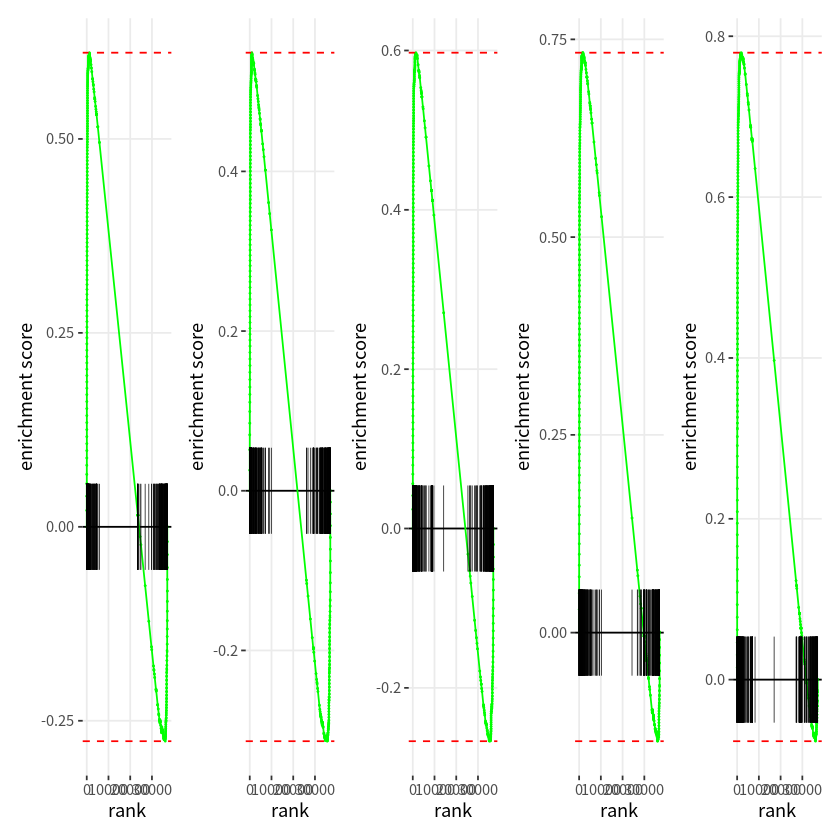

In [23]:
wrap_plots(f4, ncol = 5)